In [1]:
import numpy as np
import numpy.linalg as LA

In [2]:
A = np.array([[1,2,3],[2,4,6],[3,7,11]])
A

array([[ 1,  2,  3],
       [ 2,  4,  6],
       [ 3,  7, 11]])

In [3]:
LA.cond(A)

2.123419348145295e+16

Potrebno je odrediti centar $(p, q)$ i poluprečnik kruga $r$ koji u srednjekvadratnom smislu najbolje aproksimira skup tačaka: (0.7, 4), (7.5, 1.3), (3.3, 4.7), (6.4, -1.1), (5.6, 4.0), (4.4, -3), (0.3, -2.5) i (-1.1, 1.3). Kolika greška se pravi ovom aproksimacijom?

In [4]:
import numpy as np
from matplotlib import pyplot as plt

Skup tačaka kojima raspolažemo možemo sačuvati na nivou liste. 

In [5]:
points = [(0.7, 4), (7.5, 1.3), (3.3, 4.7), (6.4, -1.1), (5.6, 4.0), (4.4, -3), (0.3, -2.5), (-1.1, 1.3)]

In [6]:
N = len(points)

In [7]:
N

8

Dalje, možemo izdvojiti koordinate tačaka.

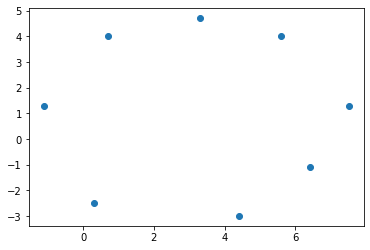

In [8]:
x = np.array([point[0] for point in points])
y = np.array([point[1] for point in points])
plt.scatter(x,y);

Jednačina kruga $(x-p)^2 + (y-q)^2 = r^2$ se može zapisati u obliku $(p^2 + q^2 - r^2) -2xp - 2yq = -x^2 -y^2$, tj. $c - 2xp - 2yq = -x^2 -y^2$ uz $c=p^2 + q^2 - r^2$ tako da je zavisnost između nepoznatih $c$, $p$, i $q$ linearna. 

Sistem po nepoznatima $c$, $p$ i $q$ se može rešiti bibiliotečkom funkcijom `lstsq`.

In [10]:
A = np.vstack((np.ones(N), -2*x, -2*y)).T
b = -x**2 -y**2

In [11]:
A

array([[  1. ,  -1.4,  -8. ],
       [  1. , -15. ,  -2.6],
       [  1. ,  -6.6,  -9.4],
       [  1. , -12.8,   2.2],
       [  1. , -11.2,  -8. ],
       [  1. ,  -8.8,   6. ],
       [  1. ,  -0.6,   5. ],
       [  1. ,   2.2,  -2.6]])

In [12]:
coefs, rss, _, _ = np.linalg.lstsq(A, b, rcond=None)

In [13]:
c, p, q = coefs

Dalje izvodimo zaključke: 

In [14]:
print('Centar kruga je: (', p , ',', q, ')')

Centar kruga je: ( 3.060303565727351 , 0.7436073210423235 )


In [15]:
r = np.sqrt(p**2 + q**2 -c)

In [16]:
print('Poluprecnik kruga je: ', r)

Poluprecnik kruga je:  4.109137036074779


In [17]:
rss

array([20.45343751])

In [18]:
print('Srednjekvadratna greska koja se pravi aproksimacijom je: ', rss[0]/N) # sto smo delili

Srednjekvadratna greska koja se pravi aproksimacijom je:  2.556679688515996


Tačke i dobijeni krug možemo grafički prikazati.

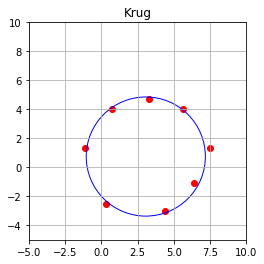

In [19]:
circle = plt.Circle((p, q), r, color='blue', fill = False)

fig, ax = plt.subplots()

plt.xlim(-5,10)
plt.ylim(-5,10)
plt.grid(linestyle='-')
ax.set_aspect(1)

ax.add_artist(circle)

plt.title('Krug')

plt.scatter(x, y, color = 'red')

plt.show()

Za dalji uvid u funkcije za crtanje možete ispratiti blog [Matplotlib artists](https://matplotlib.org/stable/gallery/shapes_and_collections/artist_reference.html).